## Evaultion of the models

### LSTM

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, load_saved_model
from src.evaluation import evaluate_regression_model, evaluate_classification_model

# Load the default configuration
config = Config()

In [2]:
model_task = "lstm_regression"

lstm_model = load_saved_model(model_task, config)

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity
)

evaluate_regression_model(lstm_model, X_test, y_test, metadata["y_max"])


2025-03-12 19:56:12,379 - INFO - Loaded saved best LSTM model from experiments/models/lstm_regression_eol65_20250312_143155_best.keras
2025-03-12 19:56:12,386 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.65


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0282  


2025-03-12 19:56:12,791 - INFO - Test Loss (MSE): 0.0011
2025-03-12 19:56:12,792 - INFO - Test MAE (rescaled): 26.8645


(0.001062121824361384, 26.86453514391809)

### CNN

2025-03-11 12:21:08,577 - INFO - Loaded saved best CNN model from experiments/models/cnn_classification_eol65_20250311_111856_best.keras
2025-03-11 12:21:08,585 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.65


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 0.8866  


2025-03-11 12:21:08,941 - INFO - Test Loss (Crossentropy): 0.9091
2025-03-11 12:21:08,942 - INFO - Test Accuracy: 0.6675


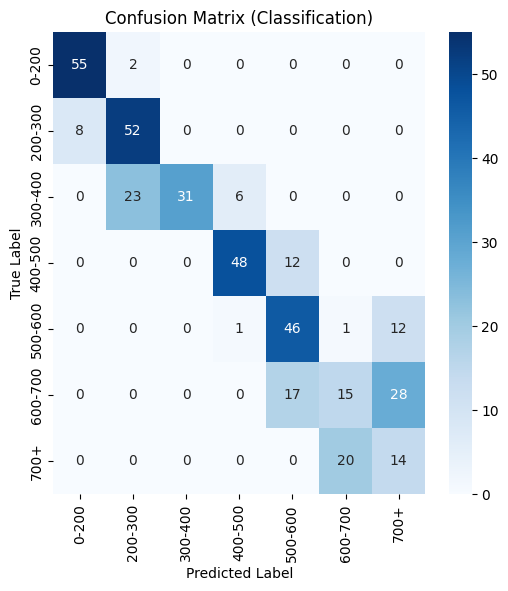

2025-03-11 12:21:09,054 - INFO - Classification Report:
              precision    recall  f1-score   support

       0-200       0.87      0.96      0.92        57
     200-300       0.68      0.87      0.76        60
     300-400       1.00      0.52      0.68        60
     400-500       0.87      0.80      0.83        60
     500-600       0.61      0.77      0.68        60
     600-700       0.42      0.25      0.31        60
        700+       0.26      0.41      0.32        34

    accuracy                           0.67       391
   macro avg       0.67      0.65      0.64       391
weighted avg       0.70      0.67      0.66       391



(0.9090995788574219,
 0.6675191521644592,
 array([6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [3]:
model_task = "cnn_classification"

cnn_model = load_saved_model(model_task, config)

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity
)

evaluate_classification_model(cnn_model, X_test, y_test, labels=config.labels)